In [1]:
#Libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
fat_df = pd.read_csv('data/data_clean/fat_data_clean.csv')
kcal_df = pd.read_csv('data/data_clean/kcal_data_clean.csv')
kg_df = pd.read_csv('data/data_clean/kg_data_clean.csv')
protein_df = pd.read_csv('data/data_clean/protein_data_clean.csv')

### Using Food Supply in Kcal dataset

In [3]:
# Removing Country column due to it being categorical and not providing much information
kcal_df = kcal_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [4]:
# Separating X and y and scaling X due to data distribution
X = kcal_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [5]:
y = kcal_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.045945087233915 (1.046547848699589)
RMSE: 1.7181916582569383 (0.30620665036897504)
MAE: 1.3105089191608015 (0.21798106861290817)
R2: 0.4041975500219154


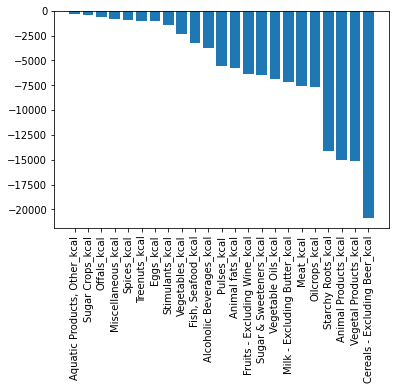

In [6]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [7]:
y = kcal_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X,y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.001524839330544918 (0.0006003448165402909)
RMSE: 0.03821181950691803 (0.008043393594474667)
MAE: 0.029620357217062604 (0.005592686718475979)
R2: 0.34757905046009363


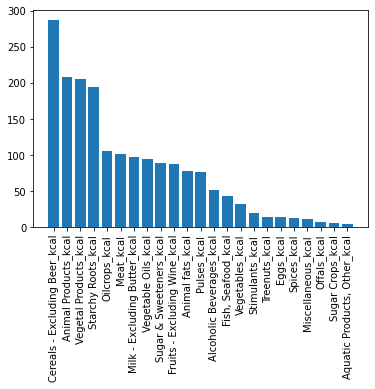

In [8]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [9]:
y = kcal_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 2.868182220315117 (1.0498986364347695)
RMSE: 1.6659226732327532 (0.3047685468091377)
MAE: 1.2266451267940073 (0.17573780945896192)
R2: 0.09989396636998334


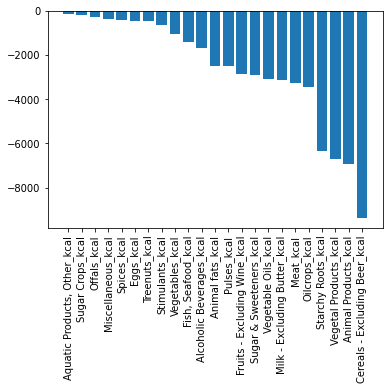

In [10]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Protein Supply dataset

In [11]:
# Removing Country column due to it being categorical and not providing much information
protein_df = protein_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [12]:
# Separating X and y and scaling X due to data distribution
X = protein_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [13]:
y = protein_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 4.388151095069351 (2.5752360585011065)
RMSE: 2.017136935990145 (0.5650749300169313)
MAE: 1.43311071079579 (0.2639119447418223)
R2: -0.0007780790548358452


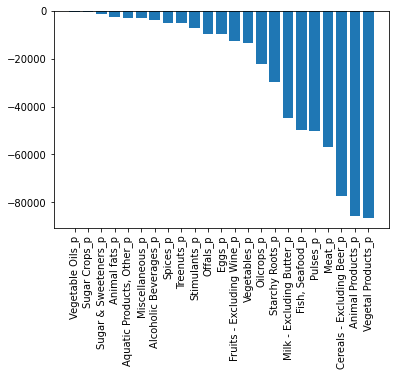

In [14]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [15]:
y = protein_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0019021437364728777 (0.0014899137057005811)
RMSE: 0.04125605629588806 (0.014145018748074969)
MAE: 0.031212772805344548 (0.007148118169725231)
R2: 0.1755692841055232


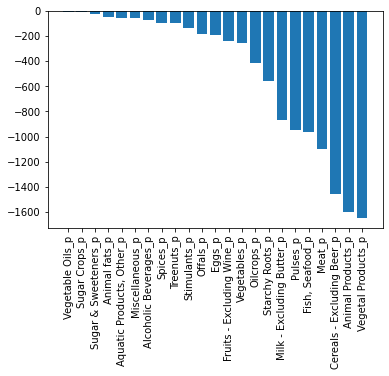

In [16]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [17]:
y = protein_df['Recovered']*5

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 80.6049026564443 (44.36215239059063)
RMSE: 8.68310316520437 (2.282240583037233)
MAE: 6.384290411047745 (1.5029376707046418)
R2: -0.026322737303389986


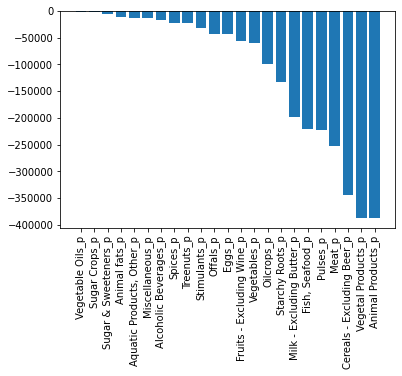

In [18]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(protein_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Food Supply in Kg dataset

In [19]:
# Removing Country column due to it being categorical and not providing much information
kg_df = kg_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [20]:
# Separating X and y and scaling X due to data distribution
X = kg_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [21]:
y = kg_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 5.580671731199482 (6.149919609674781)
RMSE: 2.1574741051601336 (0.9622770997810156)
MAE: 1.5252722122300493 (0.386418579198448)
R2: -0.17372345832920622


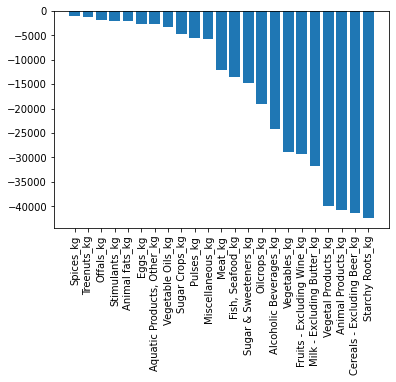

In [22]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [23]:
y = kg_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0017710571577820883 (0.0009184322194210184)
RMSE: 0.04074221563654367 (0.01054177512601483)
MAE: 0.030791227727272625 (0.006628904564333157)
R2: 0.16969325002313962


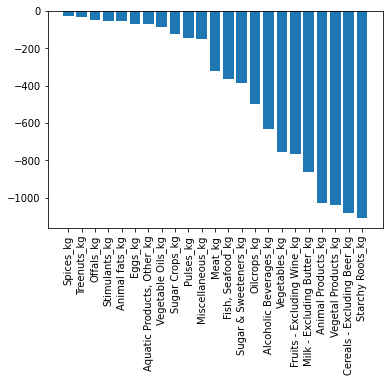

In [24]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [25]:
y = kg_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.681570213467919 (1.9277599980209383)
RMSE: 1.8638460003224029 (0.45568443088402905)
MAE: 1.3749342061342193 (0.27757797845747545)
R2: -0.11877101897871363


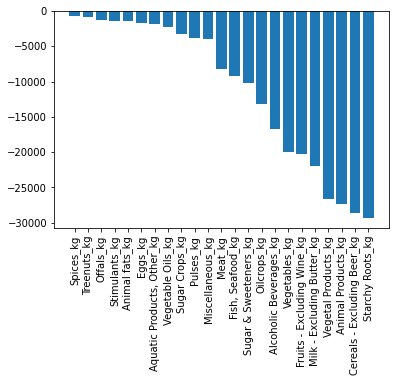

In [26]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(kg_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Using Fat Supply dataset

In [27]:
# Removing Country column due to it being categorical and not providing much information
fat_df = fat_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [28]:
# Separating X and y and scaling X due to data distribution
X = fat_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = MinMaxScaler().fit_transform(X)

##### Confirmed Attribute

In [29]:
y = fat_df['Confirmed']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 4.108980753970116 (1.9985861921128014)
RMSE: 1.9613793707103817 (0.5118317283266673)
MAE: 1.491447925346476 (0.2996580754926599)
R2: 0.21425592295799062


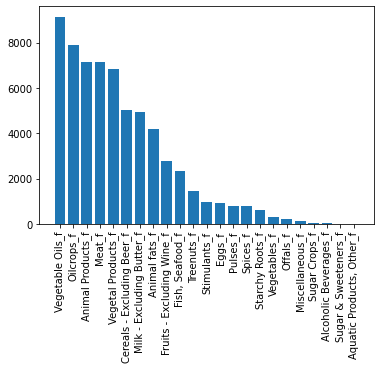

In [30]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Deaths Attribute

In [31]:
y = fat_df['Deaths']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 0.0020271733083794723 (0.0009908723966123574)
RMSE: 0.04354913609706809 (0.011430050462640708)
MAE: 0.03285962678438818 (0.006621122129243433)
R2: 0.10275072210597043


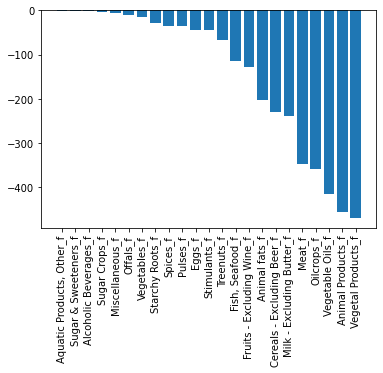

In [32]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Recovered Attribute

In [33]:
y = fat_df['Recovered']

# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Training split using K-Fold for cross_val
kfold = KFold(n_splits=10)

# Create linear model instance
lr = LinearRegression()
lr.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kfold)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=kfold)

print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")
print(f"R2: {r2.mean()}")

MSE: 3.739427173410161 (2.491857898000224)
RMSE: 1.8502388153906757 (0.5621774625790946)
MAE: 1.312731436552222 (0.29349282095484536)
R2: -0.2895570910839026


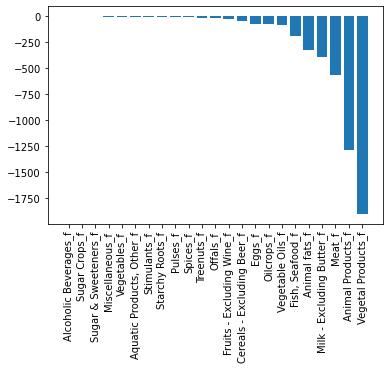

In [34]:
# Identifying the most influential features via model coefficients
importance = lr.coef_

feat_importance = zip(fat_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance
plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()